# Predicting Loan Defaults

## Goal:

### - Discover features driving borrowers to default.
### - Build a classififcation model to predict defaults.

___

# Imports

In [1]:
import wrangle2 as w
import explore as e
import preprocess as p
import numpy as np
import modeling as m

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

---

# Dictionary

| Column       | Column_type | Data_type| Description                                                                |
|--------------|-------------|----------|----------------------------------------------------------------------------|
|LoanID	       |Identifier   |string    |A unique identifier for each loan.                                          |
|Age	       |Feature      |integer	|Age of the borrower.                                                        |
|Income        |Feature      |integer   |Annual income of the borrower.                                              |
|LoanAmount    |Feature      |integer	|Amount of money being borrowed.                                             |
|CreditScore   |Feature      |integer	|Credit score of the borrower, indicating their creditworthiness.            |
|MonthsEmployed|Feature      |integer	|Number of months the borrower has been employed.                            |
|NumCreditLines|Feature      |integer	|Number of credit lines the borrower has open.                               |
|InterestRate  |Feature      |float	    |Interest rate for the loan.                                                 |
|LoanTerm      |Feature      |integer	|Term length of the loan in months.                                          |
|DTIRatio      |Feature      |float	    |Debt-to-Income ratio, borrower's debt compared to their income.             |
|Education     |Feature      |string	|Highest level of education attained by the borrower.                        |
|EmploymentType|Feature      |string	|Type of employment status of the borrower.                                  |
|MaritalStatus |Feature      |string	|Marital status of the borrower (Single, Married, Divorced).                 |
|HasMortgage   |Feature      |string	|Whether the borrower has a mortgage (Yes or No).                            |
|HasDependents |Feature      |string	|Whether the borrower has dependents (Yes or No).                            |
|LoanPurpose   |Feature      |string	|Purpose of the loan (Home, Auto, Education, Business, Other).               |
|HasCoSigner   |Feature      |string	|Whether the loan has a co-signer (Yes or No).                               |
|Default	   |Target       |integer	|Binary target variable indicating whether the loan defaulted (1) or not (0).|

---

# Acquire & Wrangle



### - Data acquired from Coursera into a csv file

### - Renamed columns & lowercased column names

### - No missing values

### - Dropped LoanID column

### - Split data 70%,15%,15%

In [2]:
train = w.train_data()

Found Data


In [3]:
train.shape

(255347, 18)

In [4]:
train.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   age                 255347 non-null  int64   
 1   income              255347 non-null  int64   
 2   loan_amount         255347 non-null  int64   
 3   credit_score        255347 non-null  int64   
 4   months_employed     255347 non-null  int64   
 5   num_credit_lines    255347 non-null  int64   
 6   interest_rate       255347 non-null  float64 
 7   loan_term           255347 non-null  int64   
 8   dti_ratio           255347 non-null  float64 
 9   education           255347 non-null  object  
 10  employment_type     255347 non-null  object  
 11  marital_status      255347 non-null  object  
 12  mortgage            255347 non-null  object  
 13  dependents          255347 non-null  object  
 14  loan_purpose        255347 non-null  object  
 15  cosigned         

In [5]:
test = w.test_data()

In [6]:
val, test = w.val_test(test)

In [7]:
val.shape, test.shape

((54717, 17), (54718, 17))

In [8]:
val.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
10383,DZSXMIETOZ,61,52577,62710,598,15,1,3.25,48,0.37,High School,Part-time,Married,Yes,No,Education,Yes
88280,PP17HLWGDB,22,75813,111086,388,93,1,9.60,12,0.69,PhD,Full-time,Married,Yes,Yes,Other,No
3248,3K794ULD90,52,49059,115361,726,81,3,14.06,48,0.39,High School,Part-time,Divorced,Yes,Yes,Education,Yes
35803,0DT3KKQVOS,44,65996,81665,617,25,4,22.24,60,0.53,PhD,Unemployed,Married,No,Yes,Other,Yes
20436,1ZVVOKN9F6,68,106215,69556,765,65,4,7.69,60,0.20,Master's,Self-employed,Married,No,No,Auto,Yes


In [9]:
w.summarize(train)

(255347, 18)

_________________________________________________



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

_________________________________________________




I38PQUQS96    1
WGB0GD3150    1
XATSFC5YHN    1
CQXDW5VBAG    1
6AIVUNAJG8    1
             ..
ZBK3GDL2LI    1
SP7XY2LPYA    1
Q2DO8ENMV1    1
5EXD8N4MT4    1
ZTH91CGL0B    1
Name: LoanID, Length: 255347, dtype: int64

_________________________________________________




55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
22    4970
32    4969
43    4965
19    4963
35    4961
68    4958
38    4955
30    4954
49    4952
50    4949
27    4945
47    4931
57    4925
54    4921
31    4908
44    4906
36    4906
28    4906
56    4902
26    4891
21    4889
46    4887
18    4884
58    4883
67    4876
51    4876
59    4871
24    4869
29    4865
63    4862
20    4861
37    4856
66    4841
25    4840
64    4840
69    4817
41    4815
48    4810
42    4803
60    4772
52    4748
23    4740
Name: Age, dtype: int64

_________________________________________________




69492     10
117102    10
121985    10
85375      9
61315      9
          ..
98969      1
72350      1
126600     1
68356      1
124446     1
Name: Income, Length: 114620, dtype: int64

_________________________________________________




133724    8
221949    8
95419     8
235258    7
108323    7
         ..
121259    1
147115    1
166792    1
39044     1
208294    1
Name: LoanAmount, Length: 158729, dtype: int64

_________________________________________________




630    528
445    521
829    520
753    519
670    515
      ... 
629    408
706    406
536    406
720    402
724    392
Name: CreditScore, Length: 550, dtype: int64

_________________________________________________




56     2227
26     2223
45     2220
107    2207
17     2198
       ... 
11     2043
39     2041
21     2014
99     2008
25     2004
Name: MonthsEmployed, Length: 120, dtype: int64

_________________________________________________




2    64130
3    63834
4    63829
1    63554
Name: NumCreditLines, dtype: int64

_________________________________________________




14.92    147
2.25     144
4.78     140
16.44    140
7.30     139
        ... 
15.50     83
4.58      82
14.34     81
25.00     53
2.00      44
Name: InterestRate, Length: 2301, dtype: int64

_________________________________________________




48    51166
60    51154
36    51061
24    51009
12    50957
Name: LoanTerm, dtype: int64

_________________________________________________




0.67    3385
0.64    3308
0.37    3288
0.13    3285
0.19    3285
        ... 
0.68    3078
0.35    3068
0.11    3051
0.10    1611
0.90    1605
Name: DTIRatio, Length: 81, dtype: int64

_________________________________________________




Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64

_________________________________________________




Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64

_________________________________________________




Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64

_________________________________________________




Yes    127677
No     127670
Name: HasMortgage, dtype: int64

_________________________________________________




Yes    127742
No     127605
Name: HasDependents, dtype: int64

_________________________________________________




Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64

_________________________________________________




Yes    127701
No     127646
Name: HasCoSigner, dtype: int64

_________________________________________________




0    225694
1     29653
Name: Default, dtype: int64

_________________________________________________



In [10]:
w.summarize(val)

(54717, 17)

_________________________________________________



<class 'pandas.core.frame.DataFrame'>
Int64Index: 54717 entries, 10383 to 15795
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          54717 non-null  object 
 1   Age             54717 non-null  int64  
 2   Income          54717 non-null  int64  
 3   LoanAmount      54717 non-null  int64  
 4   CreditScore     54717 non-null  int64  
 5   MonthsEmployed  54717 non-null  int64  
 6   NumCreditLines  54717 non-null  int64  
 7   InterestRate    54717 non-null  float64
 8   LoanTerm        54717 non-null  int64  
 9   DTIRatio        54717 non-null  float64
 10  Education       54717 non-null  object 
 11  EmploymentType  54717 non-null  object 
 12  MaritalStatus   54717 non-null  object 
 13  HasMortgage     54717 non-null  object 
 14  HasDependents   54717 non-null  object 
 15  LoanPurpose     54717 non-null  object 
 16  HasCoSigner     54717 non-null  object 
dtypes: float64(2), int64(7), ob


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

_________________________________________________




DZSXMIETOZ    1
S4XL5VAP9P    1
A05RJ8L64G    1
BRR56MJNJT    1
6R7D92AKD1    1
             ..
OUSR9WZZ5T    1
3ENOXVHGWL    1
OH2NMQNRT6    1
F5RWAWT97K    1
23PV3MCO33    1
Name: LoanID, Length: 54717, dtype: int64

_________________________________________________




53    1110
42    1110
22    1108
36    1099
20    1095
33    1092
57    1090
61    1089
39    1086
64    1086
56    1083
45    1082
51    1082
62    1081
69    1080
59    1078
67    1077
46    1069
65    1067
40    1063
26    1059
30    1054
34    1054
52    1053
54    1051
38    1051
18    1050
58    1047
49    1046
28    1045
25    1043
44    1043
55    1042
50    1037
27    1036
60    1036
43    1036
63    1033
24    1032
32    1031
31    1030
29    1026
19    1019
68    1019
66    1019
23    1017
35    1014
47    1007
21     997
48     992
37     990
41     981
Name: Age, dtype: int64

_________________________________________________




78103     6
123873    5
135628    5
45635     5
73738     5
         ..
20788     1
25144     1
106543    1
109581    1
52531     1
Name: Income, Length: 44965, dtype: int64

_________________________________________________




73974     5
35403     4
98772     4
196321    4
114907    4
         ..
119412    1
34680     1
239512    1
115140    1
143962    1
Name: LoanAmount, Length: 49029, dtype: int64

_________________________________________________




626    134
485    125
319    125
529    124
468    124
      ... 
534     78
366     77
774     77
713     77
328     76
Name: CreditScore, Length: 550, dtype: int64

_________________________________________________




64     503
42     502
115    495
79     493
80     490
      ... 
81     414
56     412
111    412
6      406
117    397
Name: MonthsEmployed, Length: 120, dtype: int64

_________________________________________________




2    13829
1    13785
4    13640
3    13463
Name: NumCreditLines, dtype: int64

_________________________________________________




3.55     43
12.16    43
19.82    40
20.80    39
23.40    39
         ..
3.41     11
10.89     9
17.92     9
16.31     8
2.00      7
Name: InterestRate, Length: 2301, dtype: int64

_________________________________________________




48    11106
36    11095
60    10873
24    10873
12    10770
Name: LoanTerm, dtype: int64

_________________________________________________




0.45    761
0.67    749
0.32    737
0.18    720
0.16    717
       ... 
0.30    638
0.48    632
0.34    608
0.90    364
0.10    330
Name: DTIRatio, Length: 81, dtype: int64

_________________________________________________




Bachelor's     13873
High School    13735
Master's       13603
PhD            13506
Name: Education, dtype: int64

_________________________________________________




Self-employed    13942
Full-time        13722
Unemployed       13627
Part-time        13426
Name: EmploymentType, dtype: int64

_________________________________________________




Divorced    18300
Married     18239
Single      18178
Name: MaritalStatus, dtype: int64

_________________________________________________




No     27433
Yes    27284
Name: HasMortgage, dtype: int64

_________________________________________________




Yes    27398
No     27319
Name: HasDependents, dtype: int64

_________________________________________________




Auto         11015
Business     10986
Other        10980
Education    10938
Home         10798
Name: LoanPurpose, dtype: int64

_________________________________________________




No     27388
Yes    27329
Name: HasCoSigner, dtype: int64

_________________________________________________



In [11]:
train, val, test = w.wrangle_data()

Found Data


In [12]:
test.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigned
53700,53,75625,28099,529,99,4,23.17,48,0.17,High School,Full-time,Married,No,Yes,Education,Yes
13087,36,131764,130797,376,1,1,18.57,24,0.65,Master's,Unemployed,Married,No,Yes,Other,Yes
4195,65,135066,104102,844,13,2,21.84,48,0.42,High School,Self-employed,Married,No,No,Education,Yes
36325,36,118147,158258,467,61,4,7.88,12,0.22,High School,Full-time,Married,No,Yes,Home,No
86584,37,91629,143221,653,66,2,22.14,48,0.10,Bachelor's,Full-time,Divorced,No,Yes,Home,No


In [13]:
train.shape, val.shape, test.shape

((255347, 17), (54717, 16), (54718, 16))

In [14]:
w.summarize(train)

(255347, 17)

_________________________________________________



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               255347 non-null  int64  
 1   income            255347 non-null  int64  
 2   loan_amount       255347 non-null  int64  
 3   credit_score      255347 non-null  int64  
 4   months_employed   255347 non-null  int64  
 5   num_credit_lines  255347 non-null  int64  
 6   interest_rate     255347 non-null  float64
 7   loan_term         255347 non-null  int64  
 8   dti_ratio         255347 non-null  float64
 9   education         255347 non-null  object 
 10  employment_type   255347 non-null  object 
 11  marital_status    255347 non-null  object 
 12  mortgage          255347 non-null  object 
 13  dependents        255347 non-null  object 
 14  loan_purpose      255347 non-null  object 
 15  cosigned          255347 non-null  object 
 16  default           25


age                 0
income              0
loan_amount         0
credit_score        0
months_employed     0
num_credit_lines    0
interest_rate       0
loan_term           0
dti_ratio           0
education           0
employment_type     0
marital_status      0
mortgage            0
dependents          0
loan_purpose        0
cosigned            0
default             0
dtype: int64

_________________________________________________




55    5064
40    5056
65    5027
33    5022
53    5010
62    4999
34    4987
45    4985
61    4982
39    4973
22    4970
32    4969
43    4965
19    4963
35    4961
68    4958
38    4955
30    4954
49    4952
50    4949
27    4945
47    4931
57    4925
54    4921
31    4908
44    4906
36    4906
28    4906
56    4902
26    4891
21    4889
46    4887
18    4884
58    4883
67    4876
51    4876
59    4871
24    4869
29    4865
63    4862
20    4861
37    4856
66    4841
25    4840
64    4840
69    4817
41    4815
48    4810
42    4803
60    4772
52    4748
23    4740
Name: age, dtype: int64

_________________________________________________




69492     10
117102    10
121985    10
85375      9
61315      9
          ..
98969      1
72350      1
126600     1
68356      1
124446     1
Name: income, Length: 114620, dtype: int64

_________________________________________________




133724    8
221949    8
95419     8
235258    7
108323    7
         ..
121259    1
147115    1
166792    1
39044     1
208294    1
Name: loan_amount, Length: 158729, dtype: int64

_________________________________________________




630    528
445    521
829    520
753    519
670    515
      ... 
629    408
706    406
536    406
720    402
724    392
Name: credit_score, Length: 550, dtype: int64

_________________________________________________




56     2227
26     2223
45     2220
107    2207
17     2198
       ... 
11     2043
39     2041
21     2014
99     2008
25     2004
Name: months_employed, Length: 120, dtype: int64

_________________________________________________




2    64130
3    63834
4    63829
1    63554
Name: num_credit_lines, dtype: int64

_________________________________________________




14.92    147
2.25     144
4.78     140
16.44    140
7.30     139
        ... 
15.50     83
4.58      82
14.34     81
25.00     53
2.00      44
Name: interest_rate, Length: 2301, dtype: int64

_________________________________________________




48    51166
60    51154
36    51061
24    51009
12    50957
Name: loan_term, dtype: int64

_________________________________________________




0.67    3385
0.64    3308
0.37    3288
0.13    3285
0.19    3285
        ... 
0.68    3078
0.35    3068
0.11    3051
0.10    1611
0.90    1605
Name: dti_ratio, Length: 81, dtype: int64

_________________________________________________




Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: education, dtype: int64

_________________________________________________




Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: employment_type, dtype: int64

_________________________________________________




Married     85302
Divorced    85033
Single      85012
Name: marital_status, dtype: int64

_________________________________________________




Yes    127677
No     127670
Name: mortgage, dtype: int64

_________________________________________________




Yes    127742
No     127605
Name: dependents, dtype: int64

_________________________________________________




Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: loan_purpose, dtype: int64

_________________________________________________




Yes    127701
No     127646
Name: cosigned, dtype: int64

_________________________________________________




0    225694
1     29653
Name: default, dtype: int64

_________________________________________________



In [25]:
w.summarize(test)

(54718, 16)

_________________________________________________



<class 'pandas.core.frame.DataFrame'>
Int64Index: 54718 entries, 53700 to 108083
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               54718 non-null  int64  
 1   income            54718 non-null  int64  
 2   loan_amount       54718 non-null  int64  
 3   credit_score      54718 non-null  int64  
 4   months_employed   54718 non-null  int64  
 5   num_credit_lines  54718 non-null  int64  
 6   interest_rate     54718 non-null  float64
 7   loan_term         54718 non-null  int64  
 8   dti_ratio         54718 non-null  float64
 9   education         54718 non-null  object 
 10  employment_type   54718 non-null  object 
 11  marital_status    54718 non-null  object 
 12  mortgage          54718 non-null  object 
 13  dependents        54718 non-null  object 
 14  loan_purpose      54718 non-null  object 
 15  cosigned          54718 non-null  object 
dtypes: float64(2), int64(7), object(7)



age                 0
income              0
loan_amount         0
credit_score        0
months_employed     0
num_credit_lines    0
interest_rate       0
loan_term           0
dti_ratio           0
education           0
employment_type     0
marital_status      0
mortgage            0
dependents          0
loan_purpose        0
cosigned            0
dtype: int64

_________________________________________________




34    1129
49    1116
19    1105
64    1105
32    1099
25    1095
54    1092
18    1092
42    1086
60    1080
52    1076
59    1073
58    1073
56    1072
46    1071
51    1063
55    1061
37    1061
33    1060
26    1055
47    1055
24    1054
35    1053
38    1052
29    1051
20    1050
67    1050
69    1050
61    1048
22    1046
36    1046
57    1043
28    1042
48    1039
65    1035
41    1035
68    1034
62    1032
44    1032
31    1031
23    1030
66    1028
21    1026
40    1023
39    1023
53    1020
63    1017
50    1006
45    1005
43    1002
27    1001
30     995
Name: age, dtype: int64

_________________________________________________




79168     5
34046     5
57904     5
121300    5
54897     5
         ..
111784    1
52534     1
15401     1
42854     1
20208     1
Name: income, Length: 44970, dtype: int64

_________________________________________________




154307    5
198411    4
85739     4
154810    4
235733    4
         ..
156778    1
185474    1
50529     1
103110    1
140080    1
Name: loan_amount, Length: 49007, dtype: int64

_________________________________________________




338    140
329    137
514    127
663    127
411    125
      ... 
387     76
360     76
690     75
834     72
705     70
Name: credit_score, Length: 550, dtype: int64

_________________________________________________




88     509
29     504
14     498
57     498
26     497
      ... 
109    416
114    415
23     415
13     413
119    410
Name: months_employed, Length: 120, dtype: int64

_________________________________________________




3    13866
4    13771
2    13546
1    13535
Name: num_credit_lines, dtype: int64

_________________________________________________




10.70    43
14.66    38
2.93     38
21.94    38
12.91    38
         ..
19.19    11
22.76    10
12.71    10
11.70     9
25.00     7
Name: interest_rate, Length: 2301, dtype: int64

_________________________________________________




60    11010
24    11000
48    10950
36    10947
12    10811
Name: loan_term, dtype: int64

_________________________________________________




0.82    755
0.86    740
0.30    739
0.12    737
0.53    733
       ... 
0.61    637
0.62    630
0.51    628
0.90    361
0.10    349
Name: dti_ratio, Length: 81, dtype: int64

_________________________________________________




Bachelor's     13895
Master's       13690
High School    13674
PhD            13459
Name: education, dtype: int64

_________________________________________________




Unemployed       13751
Self-employed    13735
Full-time        13718
Part-time        13514
Name: employment_type, dtype: int64

_________________________________________________




Divorced    18342
Single      18267
Married     18109
Name: marital_status, dtype: int64

_________________________________________________




No     27420
Yes    27298
Name: mortgage, dtype: int64

_________________________________________________




No     27540
Yes    27178
Name: dependents, dtype: int64

_________________________________________________




Business     11176
Home         10950
Other        10938
Education    10927
Auto         10727
Name: loan_purpose, dtype: int64

_________________________________________________




Yes    27485
No     27233
Name: cosigned, dtype: int64

_________________________________________________



---

# Exploration

### - Binned data for better visuals

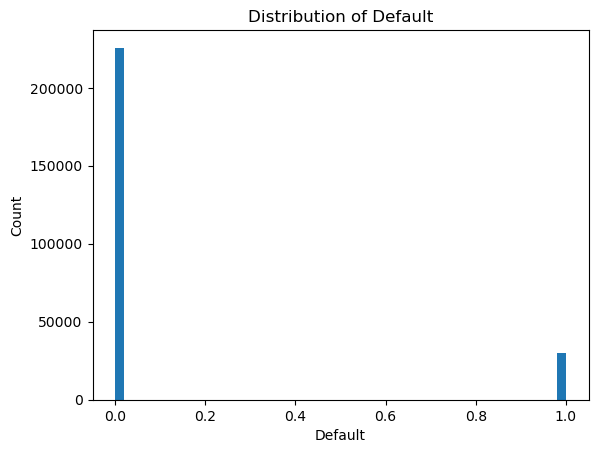

In [15]:
# Plot distribution of default
e.plt_dist(train, 'default')

There is an uneven distribution of default values. I need to balance this before modeling

In [16]:
train.head()

,age,income,loan_amount,credit_score,months_employed,num_credit_lines,interest_rate,loan_term,dti_ratio,education,employment_type,marital_status,mortgage,dependents,loan_purpose,cosigned,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [17]:
# Make copy of train and add new binned features.
train.copy = e.bin_data(train)
val.copy = e.bin_data(val)

## 1. Is there a difference in interest rates for borrowers that default and those that did not ?

### H0: Mean of interest rates of defaults = Mean of interest rates of all borrowers

### Ha: Mean of interest rates of defaults != Mean of interest rates of all borrowers

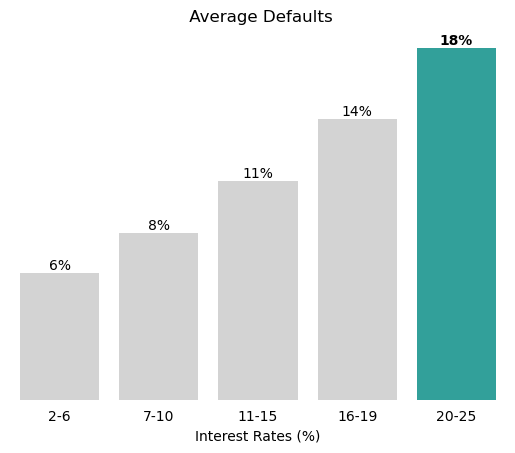

In [18]:
# Call function to visualize barplot.
e.plt_1(train.copy)

In [19]:
# 1 sample, 2 tailed t-test
e.t_test(train.copy, 'interest_rate')

a = 0.5
t = 65.48351892915397
p = 0.0

We reject the null hypothesis.


### Conclusion: 
### - Mean of interest rates of defaults != Mean of interest rates of all borrowers
### - As interest rates increase, the mean of default increases

---

## 2. Is there a difference in loan amounts for borrowers that default and those that did not ?

### H0: Mean of loan amounts of defaults = Mean of loan amount of all borrowers

### Ha: Mean of loan amounts of defaults != Mean of loan amount of all borrowers

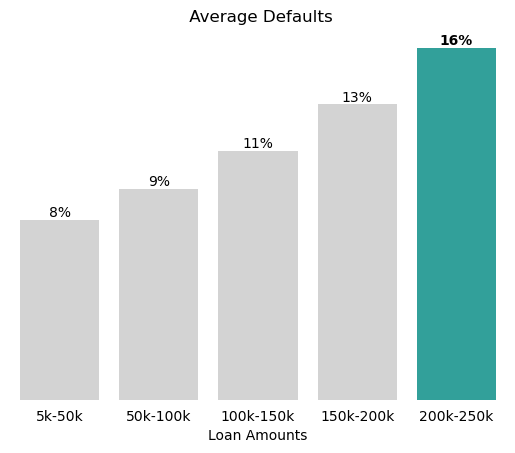

In [20]:
# Call function to visualize barplot.
e.plt_3(train.copy)

In [21]:
# 1 sample, 2 tailed t-test
e.t_test(train.copy, 'loan_amount')

a = 0.5
t = 41.934653575449744
p = 0.0

We reject the null hypothesis.


### Conclusion: 

### - Mean of loan amounts of defaults != Mean of loan amount of all borrowers
### - As loan amount increase, the mean of default increases

---

## 3. Is there a difference in age for borrowers that default and those that did not ?

### H0:  Mean of age of defaults = Mean of age of all borrowers

### Ha: Mean of age of defaults != Mean of age of all borrowers

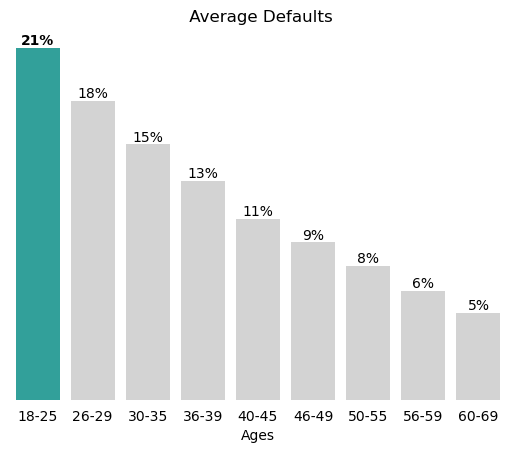

In [22]:
# Call function to visualize barplot.
e.plt_2(train.copy)

In [23]:
# 1 sample, 2 tailed t-test
e.t_test(train.copy, 'age')

a = 0.5
t = -85.97673872931917
p = 0.0

We reject the null hypothesis.


### Conclusion: 
### - Mean of age of defaults != Mean of age of all borrowers
### - As age increases, mean of default decreases

## EDA Summary:
### - Distribution of defaults significantly concentrated on non defaults (0)
### - Interest rates, loan amount, and age seem to drive borrrowers to default on loans

---

# Pre-Process

function is not working. Val subset does not have a 'default' column. How can I measure accuracy?

In [24]:
# Split data, scale data, get dummies
X_train, y_train = p.xy_split(train.copy)
X_val, y_val = p.xy_split2(val.copy)

X_train.head()

AttributeError: 'DataFrame' object has no attribute 'default'

---

# Modeling

### - Baseline = .88
### - Evaluation metric is accuracy
### - I have moved forward with all features including new binned features

## Random Forest

In [ ]:
m.r_forest(X_train, y_train, X_val, y_val)

## Decision Tree

In [ ]:
m.d_tree(X_train, y_train, X_val, y_val)

## KNearest Neighbor

In [ ]:
m.knn_m(X_train, y_train, X_val, y_val)

---

In [ ]:
# Plot distribution of default
e.plt_dist(train, 'default')

# Conclusion

### - Baseline = .88
### - Decision tree and random forest models with balanced weight parameters perform worse than the baseline
### - Distribution of default binary values heavily concentrated on one value
### - Knearest tree is weighing one outcome significantly more than the other
### - Decided not to test until I improve my train and validate accuracy

---

# Next Steps:

### - Adjust model hyperparameters 
### - Do some more feature engineering
### - Investigate feature importance and minimize dimension by dropping features
### - Run test
finish


---

# Recommendations:

### - Target loan amounts lower than 150k
### - Require higher qualifications for younger population
### - Target borrowers that qualify with low interest rates